In [2]:
import torch,gc
import torchvision
import torchvision.transforms as transforms
import os
import optuna
import torch.optim as optim
import numpy as np
import plotly
import matplotlib.pyplot as plt
import numpy as np

C:\Users\518qu\anaconda3\envs\torch-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.listdir("./natural_images")

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [3]:
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(45),
     transforms.ToTensor(),
     transforms.Normalize(0.4041, 0.3059)])


In [4]:
dataset = torchvision.datasets.ImageFolder("./natural_images",transform=transform)
train_set, dev_set, test_set = torch.utils.data.random_split(dataset, [5519,690,690],generator = torch.Generator().manual_seed(0))
batch_size = 16
trainloader = torch.utils.data.DataLoader(train_set,batch_size = batch_size,shuffle = True, num_workers=2)
devloader = torch.utils.data.DataLoader(dev_set,batch_size = batch_size,shuffle = False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set,batch_size = batch_size,shuffle = False, num_workers=2)
classes = ('airplane','car','cat','dog','flower','fruit','motorbike','person')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 224, 224]) torch.Size([16])


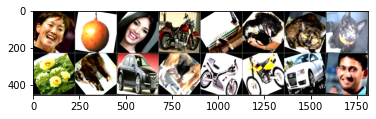

person fruit person motorbike airplane dog   cat   cat   flower cat   car   dog   motorbike motorbike car   person


In [5]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape,labels.shape)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #Block 1
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.bn1 = nn.BatchNorm2d(64)
        #Block 3
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.bn2 = nn.BatchNorm2d(128)
        #Block 3
        self.conv3 = nn.Conv2d(128, 128, 3)
        self.bn3 = nn.BatchNorm2d(128)
        #Block 4
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)
        #Block 5
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.bn5 = nn.BatchNorm2d(256)
        #Block 5
        self.conv6 = nn.Conv2d(256, 512, 3)
        self.bn6 = nn.BatchNorm2d(512)
        #Block 7
        self.conv7 = nn.Conv2d(512, 512, 3)
        self.bn7 = nn.BatchNorm2d(512)
        #Block 8
        self.conv8 = nn.Conv2d(512, 512, 3)
        self.bn8 = nn.BatchNorm2d(512)
        #Block 9
        self.pool1 = nn.MaxPool2d(3)
        self.pool2 = nn.MaxPool2d(2)
        self.pool3 = nn.MaxPool2d(5)
        self.fc = nn.Linear(2048,8)


    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x))) 
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(F.relu(self.bn5(self.conv5(x))))
        x = self.pool2(F.relu(self.bn6(self.conv6(x))))
        x = F.relu(self.bn7(self.conv7(x)))
        x = F.relu(self.bn8(self.conv8(x)))
        x = self.pool3(x)
        x = torch.flatten(x, 1) 
        x = self.fc(x)
        return x
        

In [9]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    print("Training on GPU")
else:
    device ="cpu"
    print("Training on CPU")
net = Net()
net.to(device)
gc.collect()
torch.cuda.empty_cache()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Training on GPU
[1,   100] loss: 1.381
[1,   200] loss: 0.850
[1,   300] loss: 0.670
[2,   100] loss: 0.599
[2,   200] loss: 0.560
[2,   300] loss: 0.507
[3,   100] loss: 0.420
[3,   200] loss: 0.436
[3,   300] loss: 0.424
[4,   100] loss: 0.324
[4,   200] loss: 0.377
[4,   300] loss: 0.357
[5,   100] loss: 0.378
[5,   200] loss: 0.301
[5,   300] loss: 0.296
[6,   100] loss: 0.240
[6,   200] loss: 0.243
[6,   300] loss: 0.283
[7,   100] loss: 0.237
[7,   200] loss: 0.266
[7,   300] loss: 0.268
[8,   100] loss: 0.211
[8,   200] loss: 0.253
[8,   300] loss: 0.238
[9,   100] loss: 0.196
[9,   200] loss: 0.217
[9,   300] loss: 0.202
[10,   100] loss: 0.161
[10,   200] loss: 0.214
[10,   300] loss: 0.228
[11,   100] loss: 0.180
[11,   200] loss: 0.191
[11,   300] loss: 0.182
[12,   100] loss: 0.165
[12,   200] loss: 0.191
[12,   300] loss: 0.153
[13,   100] loss: 0.176
[13,   200] loss: 0.156
[13,   300] loss: 0.181
[14,   100] loss: 0.134
[14,   200] loss: 0.155
[14,   300] loss: 0.167
[15

In [6]:
def evaluate_function(net,testloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct // total} %')
    return (100*correct//total)

In [7]:
def class_evaluate_function(net,classes,testloader):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    record = dict()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)

            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
        record[classname] = accuracy
    return record

In [12]:
network_score = evaluate_function(net,testloader)
class_score = class_evaluate_function(net,classes,testloader)

Accuracy of the network on the test images: 92 %
Accuracy for class: airplane is 94.0 %
Accuracy for class: car   is 100.0 %
Accuracy for class: cat   is 79.3 %
Accuracy for class: dog   is 74.2 %
Accuracy for class: flower is 93.0 %
Accuracy for class: fruit is 100.0 %
Accuracy for class: motorbike is 95.4 %
Accuracy for class: person is 96.0 %


Text(0.5, 1.0, 'Accuracy for each class')

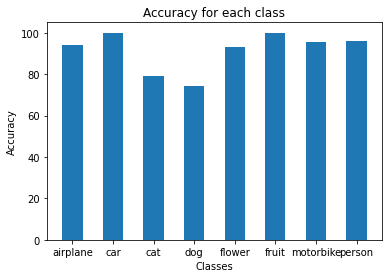

In [13]:
xlabel , network_accuracy = [],[]
for key, value in class_score.items():
    xlabel.append(key)
    network_accuracy.append(value)
plt.bar(xlabel,network_accuracy,width= 0.5)
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Accuracy for each class")

In [16]:
def train1(net,trainloader,devloader):
    gc.collect()
    torch.cuda.empty_cache()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr = 0.001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 0.001, epochs=15, steps_per_epoch=len(trainloader))
    record = dict()
    lrs, train_losses, dev_losses, accuracy = [],[],[],[]
    best_loss = np.inf
    for epoch in range(15):  # loop over the dataset multiple times
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            for parameters in optimizer.param_groups:
                para = parameters['lr']
            lrs.append(para)
            scheduler.step()
            # print statistics
            running_loss += loss.item()
        train_loss = (running_loss/len(trainloader))
        train_losses.append(train_loss)
        
        net.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(devloader,0):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs,labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
        dev_loss = (running_loss/len(devloader))
        dev_losses.append(dev_loss)
        accuracy.append(100*correct//total)
        print(f'Accuracy of the network on development dataset: {100 * correct // total} %')
        print(f"eopch:{epoch+1}, train loss: {train_loss}, development loss:{dev_loss}")
        if dev_loss < best_loss:
            best_loss = dev_loss
        record[epoch] = {'best loss': best_loss, 'train losses' : train_losses, 'development losses' :dev_losses, 'accuracy' : accuracy, 'learning rate':lrs}
    return record

In [17]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    print("Training on GPU")
else:
    device ="cpu"
    print("Training on CPU")
net1 = Net()
net1.to(device)
history1 = train1(net1,trainloader,devloader)

Training on GPU
Accuracy of the network on development dataset: 81 %
eopch:1, train loss: 0.8822084504625072, development loss:0.5191614644771273
Accuracy of the network on development dataset: 84 %
eopch:2, train loss: 0.5023928198261537, development loss:0.45955963483588264
Accuracy of the network on development dataset: 89 %
eopch:3, train loss: 0.4441514924816463, development loss:0.31848707456480374
Accuracy of the network on development dataset: 86 %
eopch:4, train loss: 0.36368010627186814, development loss:0.4004278868775476
Accuracy of the network on development dataset: 89 %
eopch:5, train loss: 0.31992675991377967, development loss:0.29175629788501695
Accuracy of the network on development dataset: 90 %
eopch:6, train loss: 0.27457052390698505, development loss:0.26695056968707254
Accuracy of the network on development dataset: 88 %
eopch:7, train loss: 0.2361548888726511, development loss:0.3591671321456405
Accuracy of the network on development dataset: 92 %
eopch:8, train

In [18]:
network_score1 = evaluate_function(net1,testloader)
class_score1 = class_evaluate_function(net1,classes,testloader)

Accuracy of the network on the test images: 95 %
Accuracy for class: airplane is 97.6 %
Accuracy for class: car   is 100.0 %
Accuracy for class: cat   is 87.8 %
Accuracy for class: dog   is 84.8 %
Accuracy for class: flower is 95.0 %
Accuracy for class: fruit is 100.0 %
Accuracy for class: motorbike is 100.0 %
Accuracy for class: person is 99.0 %


Text(0.5, 1.0, 'Accuracy for each class')

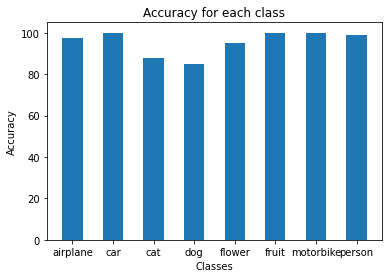

In [20]:
xlabel , network_accuracy = [],[]
for key, value in class_score1.items():
    xlabel.append(key)
    network_accuracy.append(value)
plt.bar(xlabel,network_accuracy,width= 0.5)
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Accuracy for each class")

In [24]:
def plot_accuracy(history):
    acc = []
    epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    for i in history[0]['accuracy']:
        acc.append(i)
    plt.title('Accuracy vs Number of epochs')
    plt.plot(epoch,acc, '-x')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
   
def plot_loss(history):
    train_loss = []
    dev_loss = []
    epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    for i in history[0]['train losses']:
        train_loss.append(i)
    for i in history[0]['development losses']:
        dev_loss.append(i)
    plt.plot(epoch,train_loss, '-bx')
    plt.plot(epoch,dev_loss, '-gx')
    plt.title('Losses vs Number of epochs')   
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Development'])
     

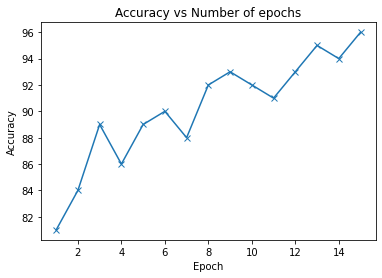

In [60]:
plot_accuracy(history1)

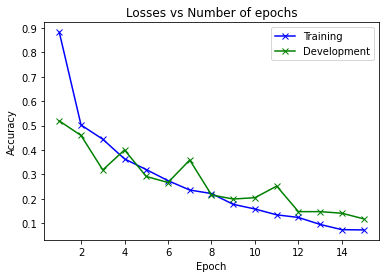

In [61]:
plot_loss(history1)

In [11]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    print("Training on GPU")
else:
    device ="cpu"
    print("Training on CPU")
net_tunning6= Net()
net_tunning6.to(device)

def objective(trial):
    criterion = nn.CrossEntropyLoss()
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-3)
    momentum = trial.suggest_uniform('momentum',0.3,0.9)
    optimizer = getattr(optim, optimizer_name)(net_tunning6.parameters(), lr, momentum)

    for epoch in range(15):
        net_tunning6.train()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
    
            optimizer.zero_grad()

            outputs = net_tunning6(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        net_tunning6.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(devloader,0):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net_tunning6(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total

        trial.report(accuracy, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

Training on GPU


In [12]:
from optuna.trial import TrialState
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-04-27 00:01:49,856] A new study created in memory with name: no-name-64ecba59-3531-4be3-8a18-14da9f8449ef
[I 2022-04-27 00:13:06,604] Trial 0 finished with value: 0.9231884057971015 and parameters: {'optimizer': 'SGD', 'lr': 0.00029886079852977705, 'momentum': 0.8210456578473897}. Best is trial 0 with value: 0.9231884057971015.
[I 2022-04-27 00:24:06,515] Trial 1 finished with value: 0.9536231884057971 and parameters: {'optimizer': 'RMSprop', 'lr': 4.663695659756178e-05, 'momentum': 0.5943577077956996}. Best is trial 1 with value: 0.9536231884057971.
[I 2022-04-27 00:35:07,899] Trial 2 finished with value: 0.9681159420289855 and parameters: {'optimizer': 'SGD', 'lr': 0.0004082429642581705, 'momentum': 0.5792029582091612}. Best is trial 2 with value: 0.9681159420289855.
[I 2022-04-27 00:46:42,925] Trial 3 finished with value: 0.9565217391304348 and parameters: {'optimizer': 'RMSprop', 'lr': 0.00023078495959329034, 'momentum': 0.7831499985597288}. Best is trial 2 with value: 0.96

Study statistics: 
  Number of finished trials:  5
  Number of pruned trials:  0
  Number of complete trials:  5
Best trial:
  Value:  0.972463768115942
  Params: 
    optimizer: RMSprop
    lr: 2.5143684145986814e-05
    momentum: 0.7372906364490748


In [13]:
def train_withtunning(net,trainloader,devloader):
    gc.collect()
    torch.cuda.empty_cache()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(net.parameters(), lr = 2.5143684145986814e-05,momentum=0.7372906364490748)
    best_loss = np.inf
    record = dict()
    train_losses = []
    dev_losses = []
    accuracy = []
    for epoch in range(15):  # loop over the dataset multiple times
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        train_loss = (running_loss/len(trainloader))
        train_losses.append(train_loss)
        
        net.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(devloader,0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs,labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        dev_loss = (running_loss/len(devloader))
        dev_losses.append(dev_loss)
        accuracy.append(100*correct//total)

        print(f'Accuracy of the network on development dataset: {100 * correct // total} %')
        print(f"eopch:{epoch+1}, train loss: {train_loss}, development loss: {dev_loss}")
        if dev_loss < best_loss:
            best_loss = dev_loss
        record[epoch] = {'best loss': best_loss, 'train losses' : train_losses, 'development losses' :dev_losses, 'accuracy' : accuracy}
    return record

In [14]:
net_tunedparameter2 = Net()
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    print("Training on GPU")
else:
    device ="cpu"
    print("Training on CPU")
net_tunedparameter2.to(device)
history_tunedparameter2 = train_withtunning(net_tunedparameter2,trainloader,devloader)

Training on GPU
Accuracy of the network on development dataset: 84 %
eopch:1, train loss: 0.6685109071325565, development loss: 0.47867810844697734
Accuracy of the network on development dataset: 86 %
eopch:2, train loss: 0.38991397133340006, development loss: 0.34135826473886316
Accuracy of the network on development dataset: 84 %
eopch:3, train loss: 0.3138246291573497, development loss: 0.41577932026914577
Accuracy of the network on development dataset: 90 %
eopch:4, train loss: 0.26312164285800593, development loss: 0.2758042386478998
Accuracy of the network on development dataset: 88 %
eopch:5, train loss: 0.23938250159169885, development loss: 0.3186839940873059
Accuracy of the network on development dataset: 89 %
eopch:6, train loss: 0.21180203273568465, development loss: 0.24758979745886542
Accuracy of the network on development dataset: 92 %
eopch:7, train loss: 0.18789912061495842, development loss: 0.1992431656372818
Accuracy of the network on development dataset: 93 %
eopch

In [20]:
network_score3 = evaluate_function(net_tunedparameter2,testloader)
class_score3 = class_evaluate_function(net_tunedparameter2,classes,testloader)

Accuracy of the network on the test images: 95 %
Accuracy for class: airplane is 98.8 %
Accuracy for class: car   is 100.0 %
Accuracy for class: cat   is 95.1 %
Accuracy for class: dog   is 75.8 %
Accuracy for class: flower is 95.0 %
Accuracy for class: fruit is 100.0 %
Accuracy for class: motorbike is 96.6 %
Accuracy for class: person is 99.0 %


Text(0.5, 1.0, 'Accuracy for each class')

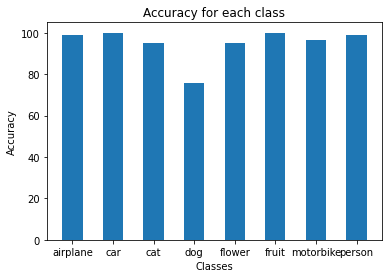

In [21]:
xlabel , network_accuracy = [],[]
for key, value in class_score3.items():
    xlabel.append(key)
    network_accuracy.append(value)
plt.bar(xlabel,network_accuracy,width= 0.5)
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Accuracy for each class")

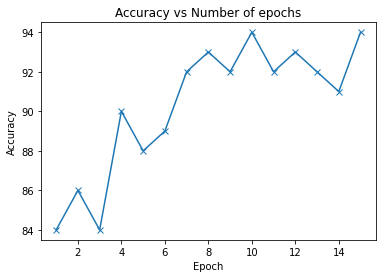

In [22]:
plot_accuracy(history_tunedparameter2)

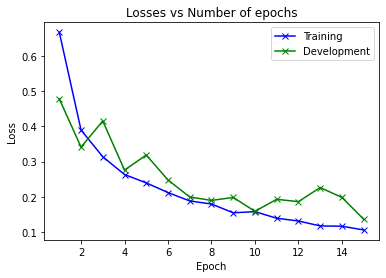

In [25]:
plot_loss(history_tunedparameter2)

Text(0.5, 1.0, 'Accuracy for each model')

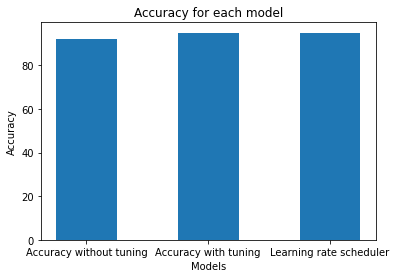

In [3]:
xlabel , network_accuracy = ['Accuracy without tuning','Accuracy with tuning','Learning rate scheduler'],[92,95,95]
plt.bar(xlabel,network_accuracy,width= 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy for each model")